# Problem Statement

### Using Iris data cluster Iris flowers into different clusters based on similarity.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
data=pd.read_csv("Iris.csv")

In [3]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [4]:
# drop unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Basic Checks

In [6]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [7]:
data.shape

(150, 5)

In [8]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
data.target.unique()


array([0, 1, 2], dtype=int64)

<Axes: xlabel='petal_length', ylabel='petal_width'>

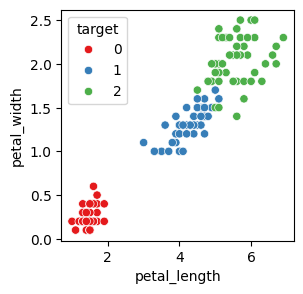

In [12]:
# EDA
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='target',palette='Set1')

# Data Preprocessing

In [13]:
# check for missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [14]:
# check for duplicates
data.duplicated().sum()

3

In [15]:
data.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


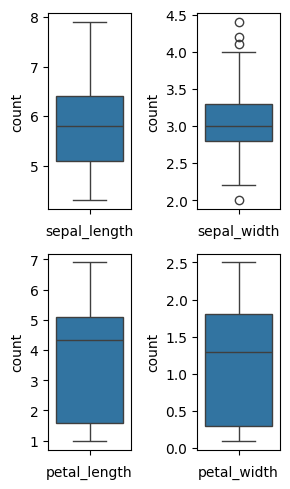

In [16]:
# Check for outliers
plt.figure(figsize=(3,5))
plotnumber=1

for column in data.drop('target',axis=1):
    if plotnumber<=4: 
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='sepal_width', ylabel='Count'>

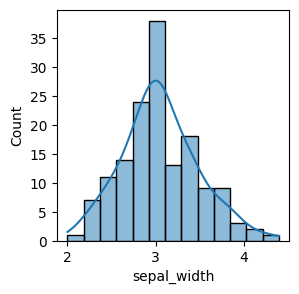

In [17]:
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='sepal_width',kde=True)

In [18]:
# 3-sigma rule
low_limit= data['sepal_width'].mean()-3*data['sepal_width'].std()
upper_limit= data['sepal_width'].mean()+3*data['sepal_width'].std()

print("lower limit",low_limit)
print("upper limit",upper_limit)

lower limit 1.7532170659134791
upper limit 4.354782934086521


In [19]:
data.sepal_width.describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [20]:
# Find values less than lower limit
data.loc[data['sepal_width']<low_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [21]:
# Find values greater than upper limit
data.loc[data['sepal_width']>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [22]:
# replace outlier with mean
data.loc[data['sepal_width']>upper_limit,'sepal_width']=data['sepal_width'].mean()

<Axes: xlabel='sepal_width'>

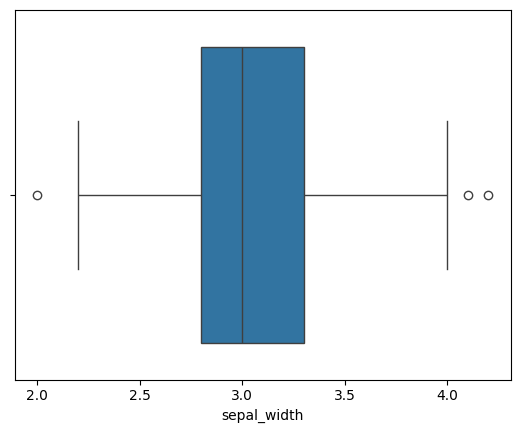

In [23]:
sns.boxplot(data=data,x='sepal_width')

In [24]:
# Apply scaling
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]=scaling.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [25]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0


In [26]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [27]:
# Remove target from data
x=data.drop('target',axis=1)

In [28]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956
146,0.553333,-1.304384,0.705893,0.922064
147,0.795669,-0.107760,0.819624,1.053537
148,0.432165,0.849539,0.933356,1.447956


# Apply Kmean model

In [29]:
# import kmean model
from sklearn.cluster import KMeans
# initialize the model
model=KMeans(n_clusters=2,random_state=10)
# train a model
model.fit(x)

KMeans(n_clusters=2, random_state=10)

In [30]:
# centroids-cluster centers
# no of clusters is sames as number of centroids
model.cluster_centers_

array([[ 0.50728948, -0.4140958 ,  0.65243918,  0.62756431],
       [-1.01457897,  0.82819159, -1.30487835, -1.25512862]])

In [31]:
model.labels_ # model's label for each cluster... given as 0&1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

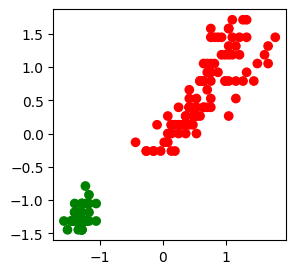

In [32]:
# Visualize the clusters created by model
plt.figure(figsize=(3,3))
color_schema=np.array(["red","green"])
plt.scatter(x.petal_length,x.petal_width,color=color_schema[model.labels_])

In [33]:
data['labels']=pd.DataFrame(model.labels_)

In [34]:
data

,sepal_length,sepal_width,petal_length,petal_width,target,labels
0,-0.900681,1.088864,-1.341272,-1.312977,0,1
1,-1.143017,-0.107760,-1.341272,-1.312977,0,1
2,-1.385353,0.370890,-1.398138,-1.312977,0,1
3,-1.506521,0.131565,-1.284407,-1.312977,0,1
4,-1.021849,1.328189,-1.341272,-1.312977,0,1
...,...,...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956,2,0
146,0.553333,-1.304384,0.705893,0.922064,2,0
147,0.795669,-0.107760,0.819624,1.053537,2,0
148,0.432165,0.849539,0.933356,1.447956,2,0


In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.5766216434816717

In [36]:
# We see overlapping of clusters because number of clusters that we have choosen might be wrong

# How to  find optimal value for K?
Elbow Method

Text(0, 0.5, 'WCSS')

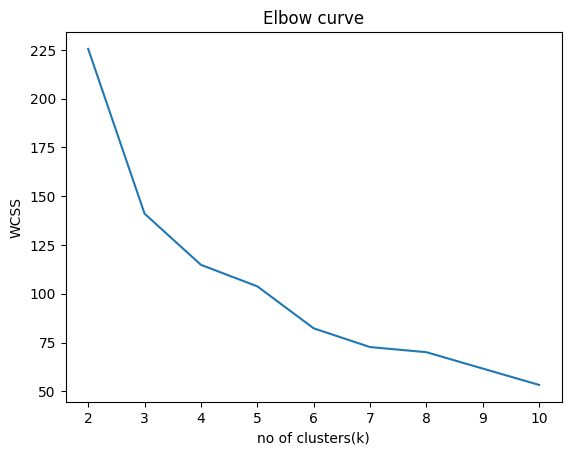

In [37]:
WCSS=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title('Elbow curve')
plt.xlabel('no of clusters(k)')
plt.ylabel('WCSS')
    
    

In [38]:
WCSS

[225.50046206211442,
 141.06688377407846,
 114.82880681387992,
 103.81831463463627,
 82.29541504498772,
 72.68279873392852,
 70.06375561804578,
 61.661777705800304,
 53.28229144165098]

In [39]:
# Clearly from elbow method the optimal value for k is 3

In [40]:
model=KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [41]:
silhouette_score(x,model.labels_)

0.461588416586402

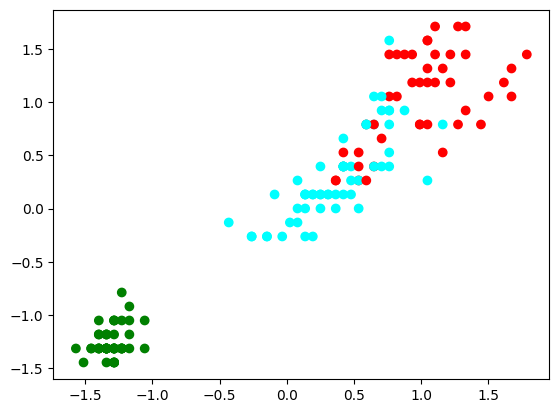

In [42]:
color_schema=np.array(["red","green", "cyan"])
plt.scatter(x.petal_length,x.petal_width,color=color_schema[model.labels_])

<Axes: xlabel='petal_length', ylabel='petal_width'>

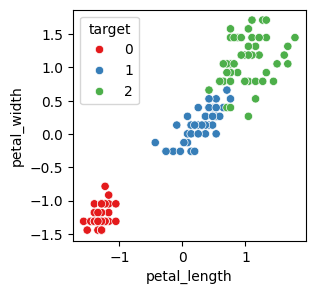

In [43]:
# EDA
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='target',palette='Set1')